<a href="https://colab.research.google.com/github/metaperson1/Machine-Learning/blob/main/Marketing_Problem_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You work as an analyst in the marketing department of a company that provides various medical insurance in Nigeria. Your manager is unhappy with the low sales volume of a specific kind of insurance. The data engineer provides you with a sample dataset for those that visit the company website for medical insurance.
The dataset contains the following columns:
- User ID
- Gender
- Age
- Salary
- Purchase: An indicator of whether the users purchased (1/Positive Class) or not-purchased (0/Negative Class) a particular product.
As we must have guessed, this is a binary classification problem, with the positive class being "Purchased" and the negative class being "Not purchased".


In [1]:
# For running pandas_profiling
! pip install pandas==0.25.3
! pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
url = 'https://drive.google.com/file/d/1DmJA2zbp_GRhiXO8JWI0j1x30KN9WPdz/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
insurance = pd.read_csv(url)
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [3]:
#Dropping User ID column 
insurance.drop( ["User ID"], axis= "columns", inplace=True)

In [4]:
#Mapping the values 1 and 0 to transform the target column
insurance["Purchased"] = insurance[ "Purchased"].apply(lambda x:1 if x == "purchased" else 0)

#Reading the data again
insurance.head (10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


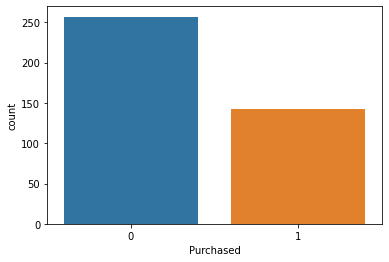

In [5]:
sns.countplot(x = "Purchased", data = insurance)

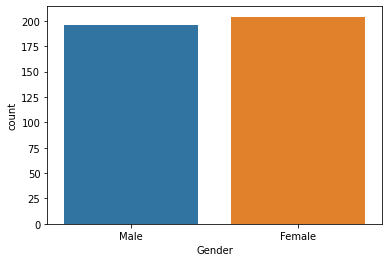

In [6]:
sns.countplot(x = "Gender", data = insurance)

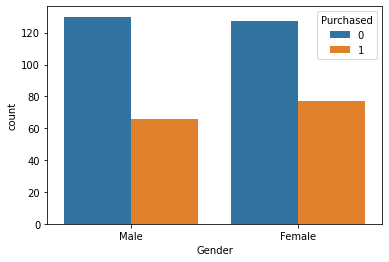

In [7]:
sns.countplot(x = "Gender", hue = "Purchased", data = insurance)

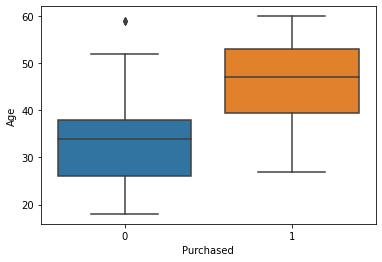

In [8]:
sns.boxplot(x = 'Purchased', y = 'Age', data = insurance)

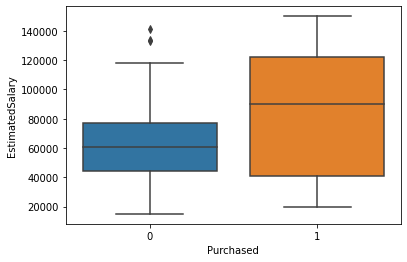

In [9]:
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = insurance)

# Model building

In [10]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

In [11]:
X = insurance.drop(["Purchased"], axis= "columns") # droping the label variable (Purchased) from the data
y = insurance["Purchased"]

In [12]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [13]:
pd.get_dummies(insurance[ "Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [14]:
X = pd.get_dummies(X)
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [15]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution

counter = Counter(y)
print(counter)

Counter({0: 257, 1: 257})


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [17]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [18]:
logistic_prediction = logisticmodel.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, logistic_prediction)

0.4563106796116505

In [20]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

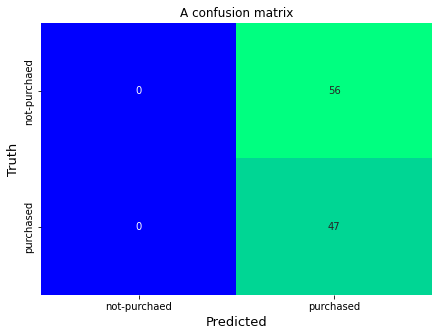

In [21]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

In [22]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
rf_prediction = randomforestmodel.predict(X_test)

In [24]:
metrics.accuracy_score(y_test, rf_prediction)

0.9320388349514563

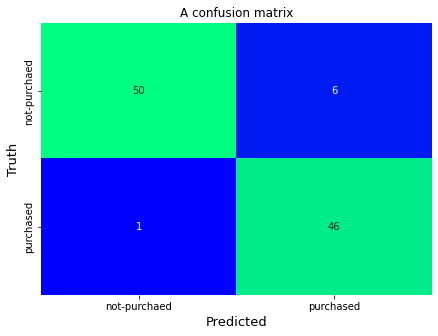

In [25]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchaed", "purchased"])

In [26]:
from sklearn.metrics import f1_score
print(f1_score(y_test, rf_prediction))

0.9292929292929293


#Let us save this model

In [27]:
# saving the model
import pickle
pickle_out = open("rfmodel.pkl", mode = "wb") 
pickle.dump(randomforestmodel, pickle_out) 
pickle_out.close()

In [28]:
pickle_in = open('rfmodel.pkl', 'rb') 
clf = pickle.load(pickle_in)

In [29]:
print(clf.predict([[40, 40000, 1,0]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Let's build this into a web app with STREAMLIT

In [30]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

     |████████████████████████████████| 745 kB 8.4 MB/s 
     |████████████████████████████████| 10.1 MB 7.8 MB/s 
     |████████████████████████████████| 164 kB 43.4 MB/s 
     |████████████████████████████████| 181 kB 42.9 MB/s 
     |████████████████████████████████| 111 kB 41.2 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 4.3 MB 40.6 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 130 kB 47.7 MB/s 
     |████████████████████████████████| 793 kB 35.3 MB/s 
     |████████████████████████████████| 380 kB 23.2 MB/s 
     |████████████████████████████████| 15.7 MB 287 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
xarray 0.18.2 requires pandas>=1.0, but y

In [31]:
%%writefile app.py
import pickle
import streamlit as st
pickle_in = open('rfmodel.pkl', 'rb') 
clf = pickle.load(pickle_in)

@st.cache()


def make_prediction(Age,EstSalary,Gender):
  if Gender == "Male":
    GenderM = 1
    GenderF = 0
  elif Gender == "Female":
    GenderM = 0
    GenderF = 1

  prediction = clf.predict([[Age, EstSalary, GenderF, GenderM]])[0]  
    
  if prediction == 0:
    value = "not to purchase"
  else:
    value = "to purchase"
  return value

def main():       
    #front end elements

    html_temp = """ 
    
    

    <div style ="background-color:black;padding:10px"> 
    <body style="background-color:blue;">
    
    <h1 style ="color:white;text-align:center;">Systa Tech Insurance Prediction</h1> 
    </body>
    </div> 
    
    """
    
    #front end
    st.markdown("![](https://marketographics.com/wp-content/uploads/2022/03/9-14-720x340.jpg)")
    
    st.markdown(html_temp, unsafe_allow_html = True) 

    # following lines create boxes in which user can enter data required to make prediction 
    Age = st.number_input('Enter Age')
    EstSalary = st.number_input('Enter Estimated Salary')
    Gender = st.selectbox('Gender',("Male","Female"))
    result = ""
    
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Make Prediction"): 
        result = make_prediction(Age, EstSalary, Gender) 
        st.success('This customer is likely {}'.format(result))
        print("Just test")
     
if __name__=='__main__':
  main()

Writing app.py


In [32]:
!streamlit run app.py &>/dev/null&

In [33]:
from pyngrok import ngrok
! ngrok authtoken 273nNZXSuxZ7XX4KBqY4QhKKJCM_3o9LcxA7x3t44oNEtmfoP
public_url = ngrok.connect('8501')
public_url

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


<NgrokTunnel: "http://a254-35-233-190-198.ngrok.io" -> "http://localhost:8501">